In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os

from scipy.stats import linregress
from scipy import stats

In [2]:
# read in csvs
circuits = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\circuits.csv', na_values=r'\N')
constructor_results = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\constructor_results.csv', na_values=r'\N')
constructor_standings = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\constructor_standings.csv', na_values=r'\N')
constructors = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\constructors.csv', na_values=r'\N')
driver_standings = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\driver_standings.csv', na_values=r'\N')
drivers = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\drivers.csv', na_values=r'\N')
pit_stops = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\pit_stops.csv', na_values=r'\N')
qualifying = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\qualifying.csv', na_values=r'\N')
races = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\races.csv', na_values=r'\N')
seasons = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\seasons.csv', na_values=r'\N')
sprint_results = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\sprint_results.csv', na_values=r'\N')
status = pd.read_csv(r'C:\Users\redye\Desktop\Formula 1\status.csv', na_values=r'\N')
results = pd.read_csv(r'C:\Users\redye\Desktop\Group4\Group-4\Formula_1_csvs\results.csv\results.csv', na_values=r'\N')

In [3]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [4]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,NaN,NaN,39.0,12.0,1:29.833,211.632,11
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,NaN,NaN,40.0,20.0,1:31.158,208.556,11
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,NaN,NaN,42.0,11.0,1:29.788,211.738,9
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,NaN,NaN,45.0,14.0,1:30.309,210.517,130


In [5]:
# Rename columns for later merging 
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
pit_stops = pit_stops.rename(columns={'time':'pitTime'})

In [6]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


In [7]:
# locate the races and pit stops we need 
df = results.loc[results["raceId"].between(1052,1073)].copy()
df2 = pit_stops.loc[pit_stops["raceId"].between(1052, 1073)].copy()

In [9]:
# this df is from Results and contains only the races we need 
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1


In [10]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [11]:
# This df is from pit stops and contains only the pit stop info relavant to the races we're analyzing 
df2.head()

,raceId,driverId,stop,lap,pitTime,duration,milliseconds
8030,1052,815,1,2,18:11:56,23.993,23993
8031,1052,842,1,4,18:16:14,38.338,38338
8032,1052,4,1,11,18:27:32,24.373,24373
8033,1052,846,1,12,18:29:05,24.899,24899
8034,1052,844,1,12,18:29:06,24.925,24925


In [12]:
df2.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
pitTime         object
duration        object
milliseconds     int64
dtype: object

In [13]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [14]:
# Merge the filtered results and pit stops onto one df
df3 = pd.merge(df, df2, on=["raceId", "driverId"],how="right")
df3

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,pitTime,duration,milliseconds_y
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,44.0,3.0,1:33.970,207.334,1,1,2,18:11:56,23.993,23993
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,48.0,5.0,1:34.090,207.069,31,1,4,18:16:14,38.338,38338
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,31.0,17.0,1:36.063,202.816,23,1,11,18:27:32,24.373,24373
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,38.0,6.0,1:34.396,206.398,1,1,12,18:29:05,24.899,24899
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,39.0,11.0,1:34.988,205.112,1,1,12,18:29:06,24.925,24925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,48.0,13.0,1:28.567,214.657,11,2,52,18:22:55,22.661,22661
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,51.0,2.0,1:26.419,219.993,5,3,53,18:23:09,21.385,21385
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,42.0,17.0,1:29.457,212.522,11,2,52,18:23:42,22.070,22070
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,50.0,7.0,1:27.496,217.285,1,2,53,18:24:01,21.909,21909


In [15]:
# rename the column 
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [16]:
# Merge this df with the drivers csv
df3 = pd.merge(df3, drivers, on=["driverId"] ,how="left")
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [17]:
df3 = df3.loc[df3['milliseconds_y'] <= 90000]
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [19]:
wetdf = df3.loc[(df3["raceId"] == 1053) | (df3["raceId"] == 1062)]
wetdf

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
40,24994,1053,839,214,31.0,9,9.0,9,9,2.0,...,30866,ocon,31.0,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon,Esteban Ocon
41,25000,1053,20,117,5.0,0,15.0,15,15,0.0,...,32024,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
42,25001,1053,854,210,47.0,18,16.0,16,16,0.0,...,51007,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
43,25002,1053,853,210,9.0,19,17.0,17,17,0.0,...,31168,mazepin,9.0,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin
44,24992,1053,842,213,10.0,5,7.0,7,7,6.0,...,31068,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,25169,1062,4,214,14.0,9,4.0,4,4,12.0,...,21523,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
433,25174,1062,830,9,33.0,3,9.0,9,9,2.0,...,20848,max_verstappen,33.0,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,Max Verstappen
434,25167,1062,1,131,44.0,1,2.0,2,2,18.0,...,21208,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
435,25175,1062,8,51,7.0,13,10.0,10,10,1.0,...,21172,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,Kimi Räikkönen


In [20]:
wetdf['stop'].nunique

<bound method IndexOpsMixin.nunique of 40     1
41     1
42     1
43     1
44     1
      ..
432    3
433    5
434    4
435    4
436    4
Name: stop, Length: 76, dtype: int64>

In [21]:
wetorder = wetdf.groupby(['code'])['positionOrder'].mean()
wetorder

code
ALO     7.000000
BOT    18.000000
GAS     6.000000
GIO    13.428571
HAM     2.000000
LAT     7.000000
LEC     4.000000
MAZ    16.250000
MSC    14.400000
NOR     9.000000
OCO     6.333333
PER    11.000000
RAI    11.200000
RIC     9.333333
RUS    11.666667
SAI     3.666667
STR     8.000000
TSU     9.000000
VER     7.400000
VET    16.666667
Name: positionOrder, dtype: float64

In [22]:
wetpit = wetdf.groupby(['code'])['milliseconds_y'].mean()
wetpit

code
ALO    36777.500000
BOT    30167.000000
GAS    33684.166667
GIO    33821.428571
HAM    33439.166667
LAT    30892.500000
LEC    31002.000000
MAZ    34028.000000
MSC    38726.800000
NOR    34460.500000
OCO    35019.333333
PER    44608.000000
RAI    37250.400000
RIC    30151.666667
RUS    27181.000000
SAI    31864.333333
STR    48264.000000
TSU    39133.750000
VER    25903.600000
VET    36389.666667
Name: milliseconds_y, dtype: float64

In [23]:
x = wetorder
y = wetpit

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)
regress_values = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)



y = 100.58x + 33675.99


y = 100.58x + 33675.99
The r-value is: 0.007043395845241737
y = 100.58x + 33675.99
The r-value is: 0.007043395845241737


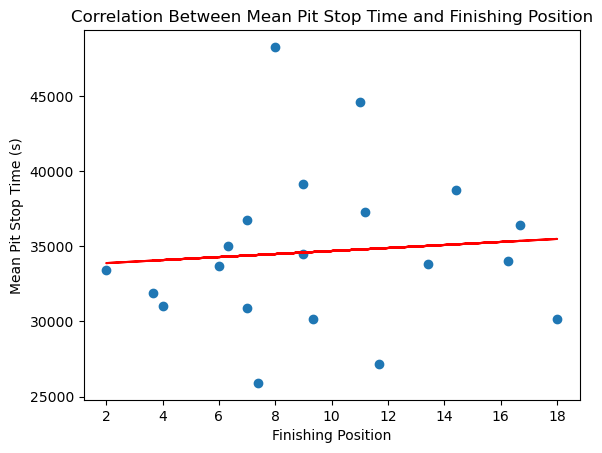

In [24]:


# Print line equation
print(line_eq)

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Print line equation
print(line_eq)

# Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.scatter(x, y)
plt.plot(x, regress_values, "r")
plt.annotate(line_eq, (10,5000), fontsize=15, color='r')
plt.title('Correlation Between Mean Pit Stop Time and Finishing Position')
plt.xlabel("Finishing Position")
plt.ylabel('Mean Pit Stop Time (s)')

plt.show()

In [25]:
wetdf['pitcounts'] = 1
wetdf

C:\Users\redye\AppData\Local\Temp\ipykernel_26992\508931637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wetdf['pitcounts'] = 1


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName,pitcounts
40,24994,1053,839,214,31.0,9,9.0,9,9,2.0,...,ocon,31.0,OCO,Esteban,Ocon,1996-09-17,French,http://en.wikipedia.org/wiki/Esteban_Ocon,Esteban Ocon,1
41,25000,1053,20,117,5.0,0,15.0,15,15,0.0,...,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel,1
42,25001,1053,854,210,47.0,18,16.0,16,16,0.0,...,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher,1
43,25002,1053,853,210,9.0,19,17.0,17,17,0.0,...,mazepin,9.0,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,Nikita Mazepin,1
44,24992,1053,842,213,10.0,5,7.0,7,7,6.0,...,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,25169,1062,4,214,14.0,9,4.0,4,4,12.0,...,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso,1
433,25174,1062,830,9,33.0,3,9.0,9,9,2.0,...,max_verstappen,33.0,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,Max Verstappen,1
434,25167,1062,1,131,44.0,1,2.0,2,2,18.0,...,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,1
435,25175,1062,8,51,7.0,13,10.0,10,10,1.0,...,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,Kimi Räikkönen,1


In [26]:
wetstops = wetdf.groupby(['code'])['pitcounts'].sum()/2
wetstops

code
ALO    2.0
BOT    0.5
GAS    3.0
GIO    3.5
HAM    3.0
LAT    1.0
LEC    0.5
MAZ    2.0
MSC    2.5
NOR    1.0
OCO    3.0
PER    0.5
RAI    2.5
RIC    1.5
RUS    1.5
SAI    1.5
STR    1.0
TSU    2.0
VER    2.5
VET    3.0
Name: pitcounts, dtype: float64

In [27]:
x2 = wetorder
y2 = wetstops

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x2, y2)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.0x + 1.88


y = 0.0x + 1.88
The r-value is: 0.00013526409084388307
y = 0.0x + 1.88
The r-value is: 0.00013526409084388307


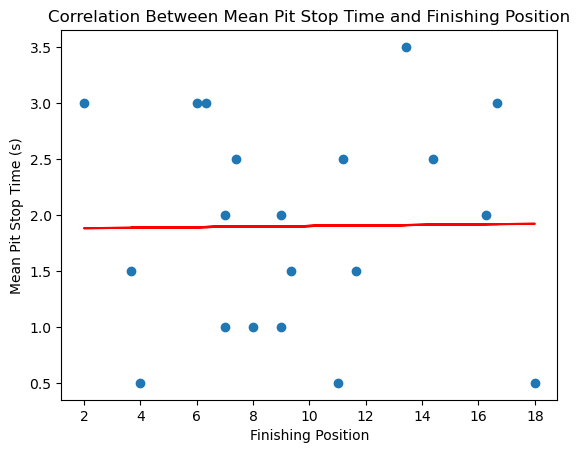

In [28]:
# Print line equation
print(line_eq)

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Print line equation
print(line_eq)

# Print the r value
print(f"The r-value is: {rvalue**2}")

plt.show()
plt.scatter(x2, y2)
plt.plot(x2, regress_values, "r")
plt.annotate(line_eq, (10,5000), fontsize=15, color='r')
plt.title('Correlation Between Mean Pit Stop Time and Finishing Position')
plt.xlabel("Finishing Position")
plt.ylabel('Mean Pit Stop Time (s)')

plt.show()